In [61]:

import pandas as pd
import numpy as np

In [21]:
#loading the data
df=pd.read_csv("tsf_data.txt",sep=",",header=0)

In [22]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [23]:
#checking the shape of data
df.shape

(25, 2)

In [24]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [25]:
#counting the null value in dataframe
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


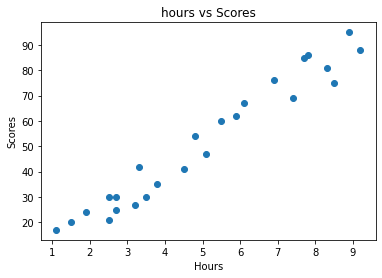

In [27]:
#explore scatter ploat to see data distrbution
import matplotlib.pyplot as plt
plt.scatter(df['Hours'],df['Scores'])
plt.title("hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()


In [28]:
#split the data feture(x) and outcome(y)
y = df["Scores"]

x = df.drop(["Scores"],axis=1)

In [29]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [53]:
#spliting the data train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [54]:
#scaling the data in range 0 to 1
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

C:\Users\Vipin Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Vipin Kumar\Anaconda3\lib\site-packages\pandas\core\frame.py:3395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Vipin Kumar\Anaconda3\lib\site-packages\pandas\core\frame.py:3367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

In [55]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
#test the model on test data
y_predict = model.predict(x_test)


score=model.score(x_test, y_test)
print(score)

0.967295167628824


In [57]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})  
df1

,Actual,Predicted
8,81,85.089647
9,25,29.188039
20,30,29.188039
6,88,94.073834
1,47,53.145871


In [58]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np

print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 4.261870351533085
Mean Squared Error: 21.91747046186739
Root Mean Squared Error: 4.681609815209656


**Prediction on New Data**

In [59]:
data=float(input("Study hours :"))
data=[[data]]
new_data=pd.DataFrame(data,columns=["Hours"])
new_data[new_data.columns] = scalerX.transform(new_data[new_data.columns])

Study hours :9.25


In [60]:
newy=model.predict(new_data)
newy=np.round(newy,2)
print("Your score is: ",newy)

Your score is:  [94.57]
